### Классная работа

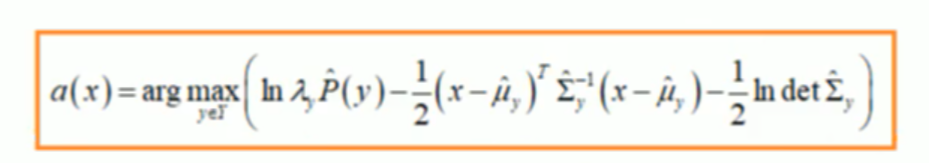

0


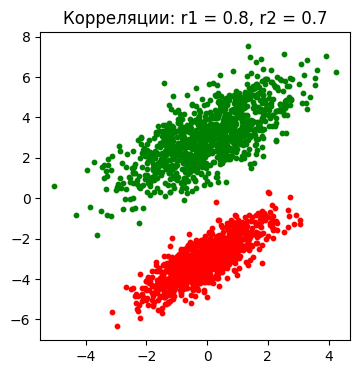

In [ ]:
# Гауссовский байесовский классификатор

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

# исходные параметры распределений двух классов
r1 = 0.8  # коэф корреляции
D1 = 1.0  # дисперсия
mean1 = [0, -3]  # математическое ожидание
V1 = [[D1, D1 * r1], [D1 * r1, D1]]  # ковариационная матрица

r2 = 0.7  # коэф корреляции
D2 = 2.0  # дисперсия
mean2 = [0, 3]  # математическое ожидание
V2 = [[D2, D2 * r2], [D2 * r2, D2]]  # ковариационная матрица

# моделирование обучающей выборки (для каждого класса отдельно)
N = 1000
x1 = np.random.multivariate_normal(mean1, V1, N).T
x2 = np.random.multivariate_normal(mean2, V2, N).T

# вычисление оценок математического ожидания и ковариационных матриц
mm1 = np.mean(x1.T, axis=0)
mm2 = np.mean(x2.T, axis=0)

a = (x1.T - mm1).T
VV1 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

a = (x2.T - mm2).T
VV2 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

# модель гауссовского байесовского классификатора
Py1, L1 = 0.5, 1  # вероятности появления классов
Py2, L2 = 1 - Py1, 1  # и величины штрафов неверной классификации

b = lambda x, v, m, l, py: np.log(l * py) - 0.5 * (x - m) @ np.linalg.inv(v) @ (x - m).T - 0.5 * np.log(np.linalg.det(v))

x = np.array([0, -4])  # входной вектор в формате (x, y)
a = np.argmax([b(x, VV1, mm1, L1, Py1), b(x, VV2, mm2, L2, Py2)])  # классификатор
print(a)

# вывод графиков
plt.figure(figsize=(4, 4))
plt.title(f"Корреляции: r1 = {r1}, r2 = {r2}")
plt.scatter(x1[0], x1[1], s=10, c='red')
plt.scatter(x2[0], x2[1], s=10, c='green')
plt.show()

### Домашняя работа

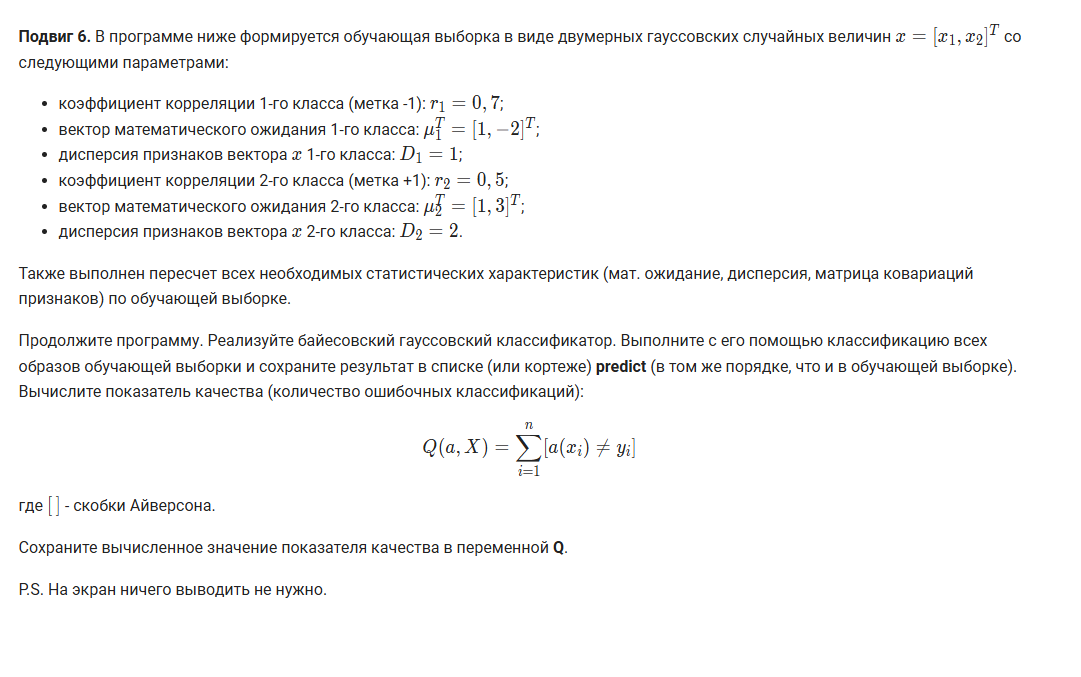

In [ ]:
import numpy as np

np.random.seed(0)

# исходные параметры распределений двух классов
r1 = 0.7
D1 = 1.0
mean1 = [1, -2]
V1 = [[D1, D1 * r1], [D1 * r1, D1]]

r2 = 0.5
D2 = 2.0
mean2 = [1, 3]
V2 = [[D2, D2 * r2], [D2 * r2, D2]]

# моделирование обучающей выборки (для каждого класса отдельно)
N = 1000
x1 = np.random.multivariate_normal(mean1, V1, N).T
x2 = np.random.multivariate_normal(mean2, V2, N).T

# обучающая выборка для байесовского классификатора (стандартный формат)
x_train = np.hstack([x1, x2]).T
y_train = np.hstack([np.ones(N) * -1, np.ones(N)])

# вычисление оценок математических ожиданий
mm1 = np.mean(x1.T, axis=0)
mm2 = np.mean(x2.T, axis=0)

# вычисление ковариационных матриц
a = (x1.T - mm1).T
VV1 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

a = (x2.T - mm2).T
VV2 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

# параметры для гауссовского байесовского классификатора
Py1, L1 = 0.5, 1  # вероятности появления классов
Py2, L2 = 1 - Py1, 1  # и величины штрафов неверной классификации

proba = lambda x, l, py, m, w: np.log(l*py) - 1/2*(x - m).T @ np.linalg.inv(w) @ (x - m) - 1/2*np.log(np.linalg.det(w))
model = lambda a1, a2: np.argmax([a1, a2]) * 2 - 1

predict = []
for x in x_train:
    a1 = proba(x, L1, Py1, mm1, VV1)
    a2 = proba(x, L2, Py2, mm2, VV2)
    pred = model(a1, a2)
    predict.append(pred)
predict = np.array(predict)
Q = np.sum(predict != y_train)
Q

4

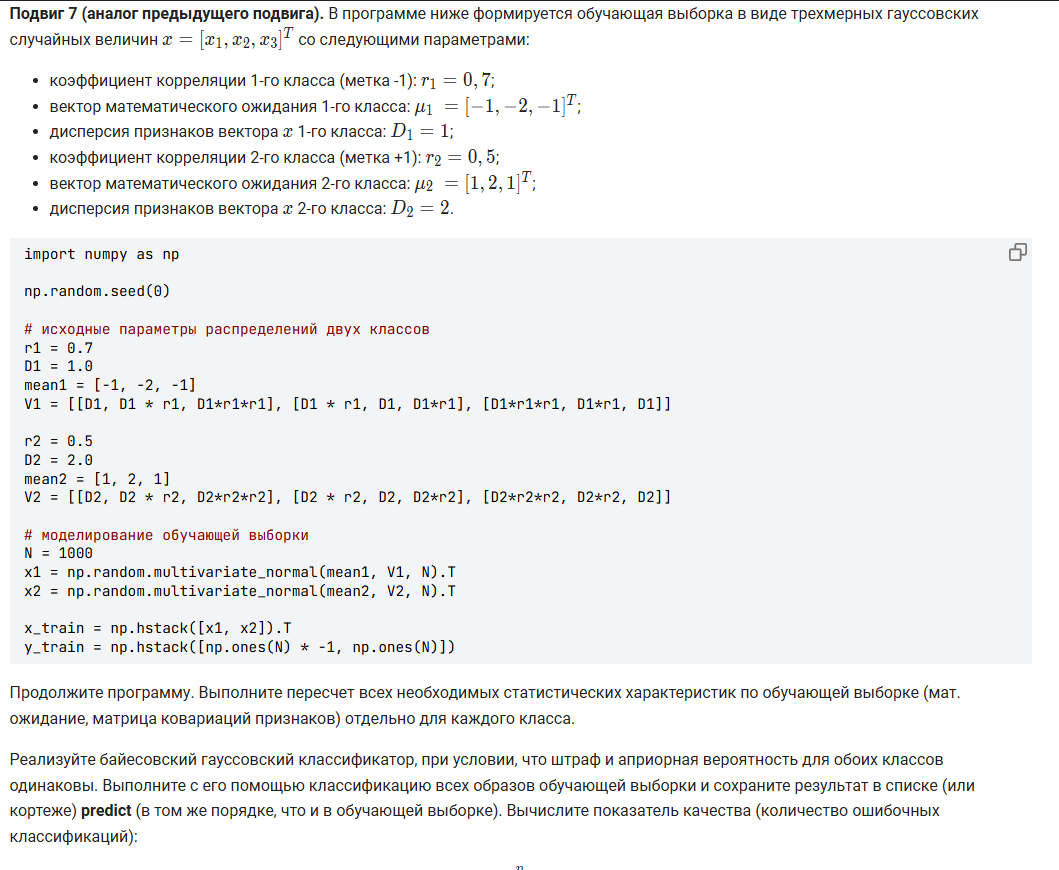
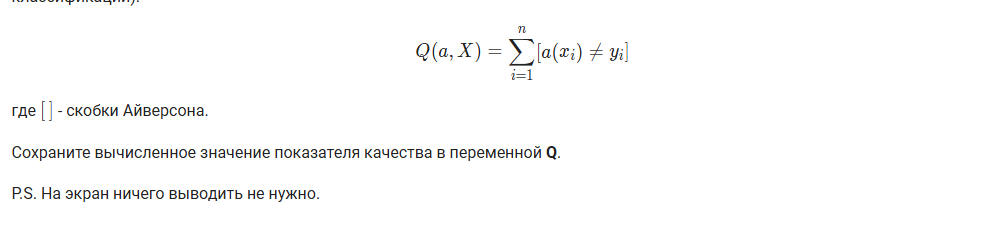

In [22]:
import numpy as np

np.random.seed(0)

# исходные параметры распределений двух классов
r1 = 0.7
D1 = 1.0
mean1 = [-1, -2, -1]
V1 = [[D1, D1 * r1, D1*r1*r1], [D1 * r1, D1, D1*r1], [D1*r1*r1, D1*r1, D1]]

r2 = 0.5
D2 = 2.0
mean2 = [1, 2, 1]
V2 = [[D2, D2 * r2, D2*r2*r2], [D2 * r2, D2, D2*r2], [D2*r2*r2, D2*r2, D2]]

# моделирование обучающей выборки (для каждого класса отдельно)
N = 1000
x1 = np.random.multivariate_normal(mean1, V1, N).T
x2 = np.random.multivariate_normal(mean2, V2, N).T

x_train = np.hstack([x1, x2]).T
y_train = np.hstack([np.ones(N) * -1, np.ones(N)])


mm1 = np.mean(x1.T, axis=0)
mm2 = np.mean(x2.T, axis=0)

# вычисление ковариационных матриц
a = (x1.T - mm1).T
VV1 = np.cov(a)

a = (x2.T - mm2).T
VV2 = np.cov(a)

# вероятности классов и штрафы
Py1, L1 = 0.5, 1
Py2, L2 = 0.5, 1

proba = lambda x, py, l, m, v: np.log(l*py) - 1/2*(x - m).T@np.linalg.inv(v)@(x - m) - 1/2*np.log(np.linalg.det(v))
model = lambda a1, a2: np.argmax([a1, a2]) * 2 - 1

predict = []
for x in x_train:
    a1 = proba(x, Py1, L1, mm1, VV1)
    a2 = proba(x, Py2, L2, mm2, VV2)
    pred = model(a1, a2)

    predict.append(pred)
predict = np.array(predict)
Q = np.sum(predict != y_train)
Q

78